# **Analyzing Apartment Rental Classified Data**

In [1]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [3]:
# Set the default rendering engine to 'colab'
pio.renderers.default = 'colab'

# **Loading and Analysing the dataset**




In [4]:
# Set the path to the orca executable
pio.orca.config.executable = '/content/sample_data'

In [5]:

# Load the dataset
df = pd.read_csv('/content/apartments_for_rent_classified_10K.csv', encoding='latin1', delimiter=';')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Display data types of columns
print("\nData Types:")
print(df.dtypes)

# Select relevant columns
selected_columns = ['bathrooms', 'bedrooms', 'square_feet', 'cityname', 'price', 'price_type', 'state', 'latitude', 'longitude', 'source']
df1 = df[selected_columns]

# Display first few rows of the selected columns
print("\nSelected Columns:")
print(df1.head())

# Handling missing values
print("\nMissing Values before dropping:")
print(df1.isnull().sum())
df1 = df1.dropna()
print("\nMissing Values after dropping:")
print(df1.isnull().sum())

Dataset Preview:
           id                category  \
0  5668626895  housing/rent/apartment   
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title  \
0  Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms  \
0  This unit is located at second St NE, Uhland T...       NaN        NaN   
1  This unit is located at 814 Schutte Road, Evan...       NaN        NaN   
2  This unit is located at N Scott St, 14th St N,...       NaN        1.0   
3  This unit is located at 1717 12th Ave, Seattle...       NaN        1.0   
4  This unit i


Average Price by Number of Bathrooms:
    bathrooms         price
0           1   1265.151639
1           1   1527.117216
2           2   1754.866778
3           2   2236.572816
4           3   2773.086705
5           3   3041.181818
6           4   4034.000000
7           4   4357.416667
8           5   6318.125000
9           5   6500.000000
10          6   9500.000000
11          7   8350.000000
12          8  25000.000000
13          8  11000.000000


<ipython-input-6-c457bf1a887b>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



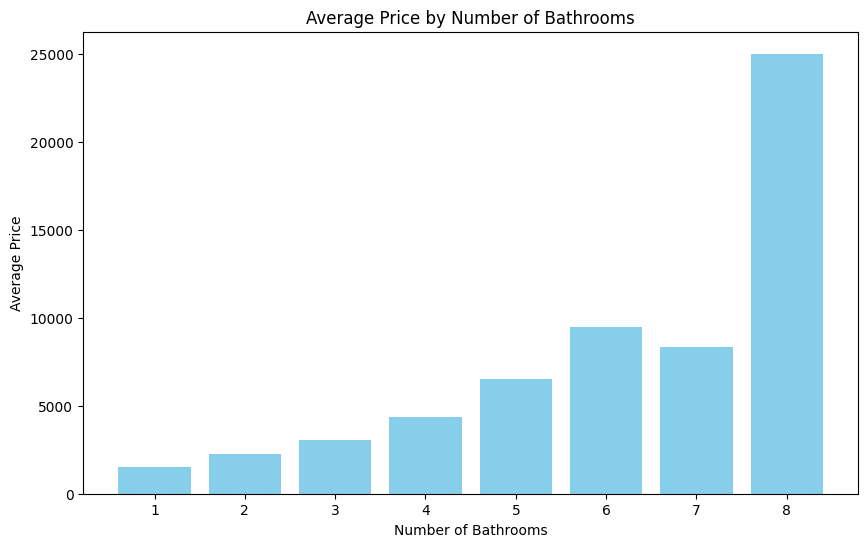

In [6]:
# Descriptive statistics by the number of bathrooms
by_baths = df1.groupby(['bathrooms']).mean().reset_index()
by_baths['bathrooms'] = by_baths['bathrooms'].astype(int)
print("\nAverage Price by Number of Bathrooms:")
print(by_baths[['bathrooms', 'price']])

# Bar plot for average price by number of bathrooms
plt.figure(figsize=(10, 6))
plt.bar(by_baths['bathrooms'], by_baths['price'], color='skyblue')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.title('Average Price by Number of Bathrooms')
plt.savefig('average_price_by_bathrooms.png')
plt.show()


In [7]:
# Descriptive statistics for the dataset
print("\nDescriptive Statistics:")
print(df1.describe())


Descriptive Statistics:
         bathrooms     bedrooms   square_feet         price     latitude  \
count  9883.000000  9883.000000   9883.000000   9883.000000  9883.000000   
mean      1.380552     1.747040    943.237580   1486.954670    37.682879   
std       0.616038     0.941714    527.162123   1078.622808     5.516318   
min       1.000000     0.000000    107.000000    200.000000    21.315500   
25%       1.000000     1.000000    650.000000    949.000000    33.667900   
50%       1.000000     2.000000    803.000000   1275.000000    38.755500   
75%       2.000000     2.000000   1100.000000   1695.000000    41.384600   
max       8.500000     9.000000  11318.000000  52500.000000    61.594000   

         longitude  
count  9883.000000  
mean    -94.639141  
std      15.809754  
min    -158.022100  
25%    -101.301700  
50%     -93.651600  
75%     -82.115700  
max     -70.191600  


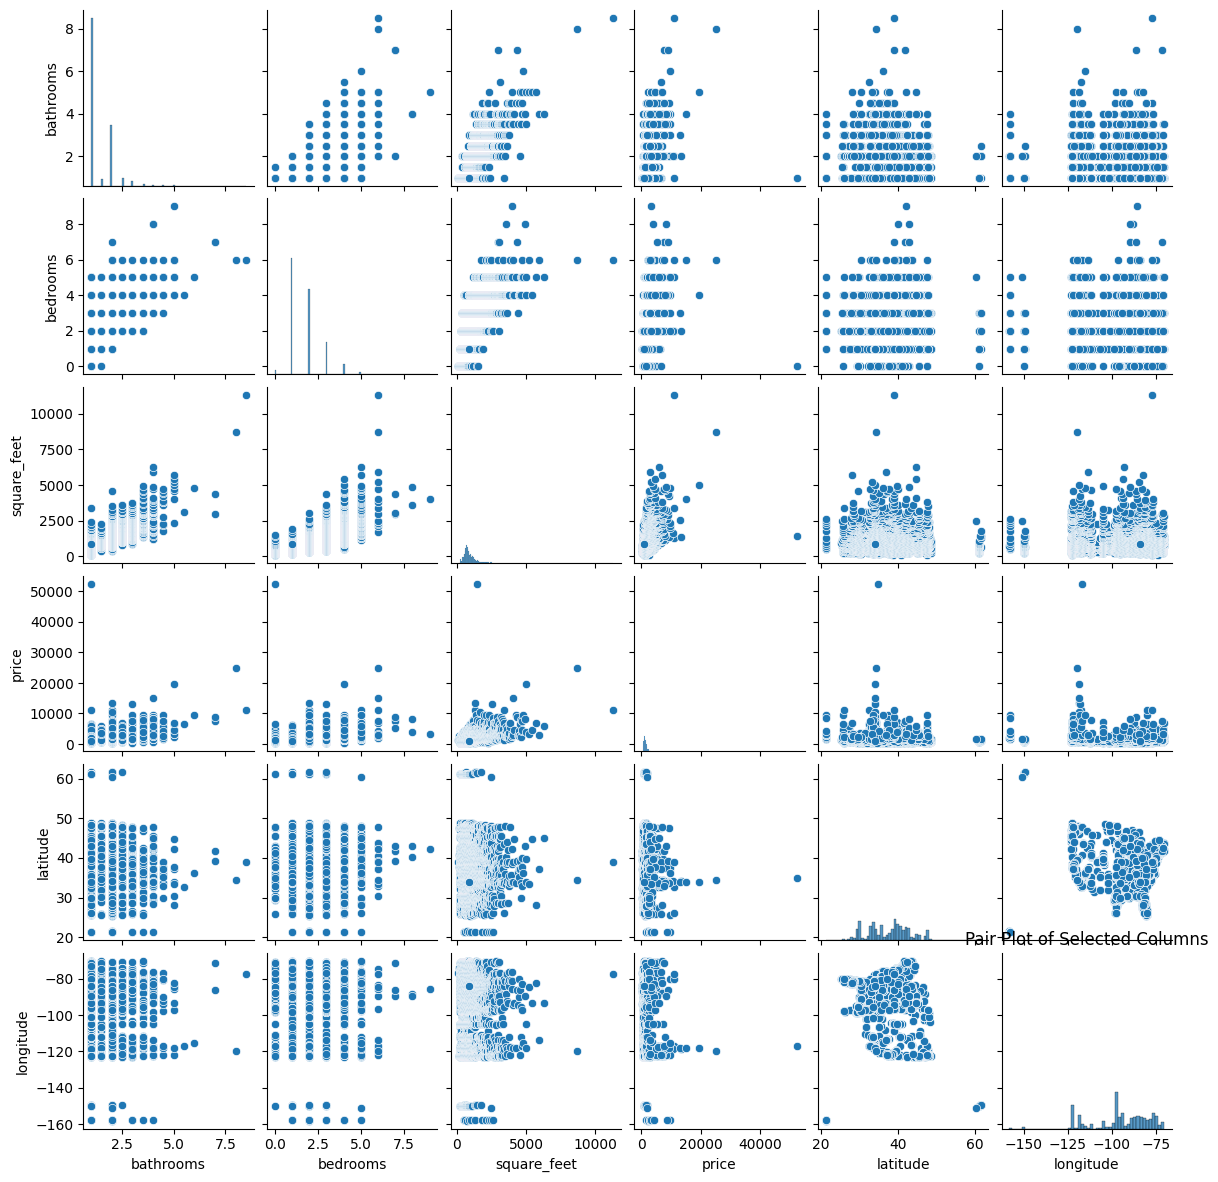

In [8]:
# Pair plot using seaborn
sns.pairplot(df1, height=2)
plt.title('Pair Plot of Selected Columns')
plt.savefig('pair_plot.png')
plt.show()

In [9]:
# Histogram using plotly express
fig = px.histogram(df1, x='price', color_discrete_sequence=px.colors.qualitative.Set3, title="Rent Prices Distribution Histogram")
fig.write_image("rent_prices_histogram.png")  # Save the plotly figure as an image
fig.show()

# Outlier Handling for Regression

In [10]:
# Boxplot using plotly express
fig = px.box(df1, x="price", title='Boxplot for Rent Prices')
pio.write_image(fig,"boxplot_rent_prices.png")
fig.show()

In [11]:
# Filtering outliers based on price
outliers = np.where(df1['price'] > 5100)
df1 = df1[df1['price'] <= 5100]

# Updated boxplot after removing outliers
fig = px.box(df1, x="price", title='Boxplot for Rent Prices (Outliers Removed)')
fig.write_image("boxplot_rent_prices_outliers_removed.png")
fig.show()

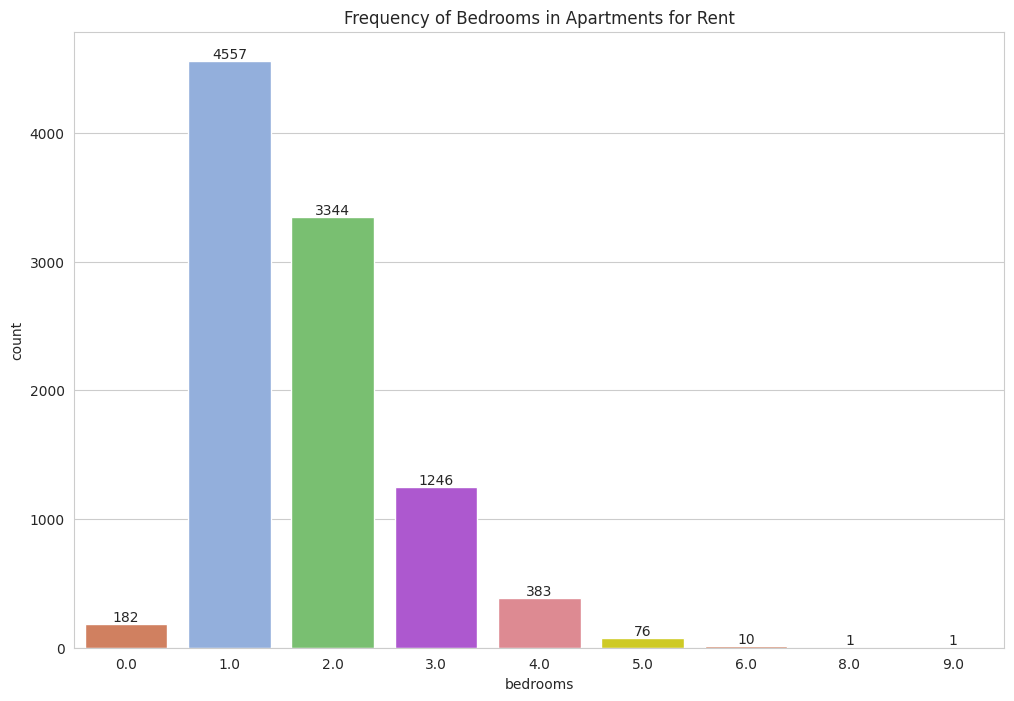

In [12]:
# Countplot using seaborn for the number of bedrooms
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x='bedrooms', data=df1, palette=['#e3784d', '#87ace8', '#6ecc64', '#b644e3', '#eb7c87', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of Bedrooms in Apartments for Rent')
plt.savefig('bedrooms_frequency_countplot.png')
plt.show()

In [13]:
# Pie chart using plotly express for the number of bedrooms
fig = px.pie(df1, names='bedrooms', height=500, width=800, color_discrete_sequence=px.colors.sequential.deep,
             title='Pie Chart for Bedrooms in Apartments for Rent')
fig.update_traces(textfont_size=15)
fig.update_layout(margin=dict(l=20, r=20, t=50, b=20))
fig.write_image("bedrooms_pie_chart.png")
fig.show()


In [14]:

# Histogram for square feet using plotly express
fig = px.histogram(df1, x="square_feet", title='Square Feet Distribution')
fig.write_image("square_feet_histogram.png")
fig.show()

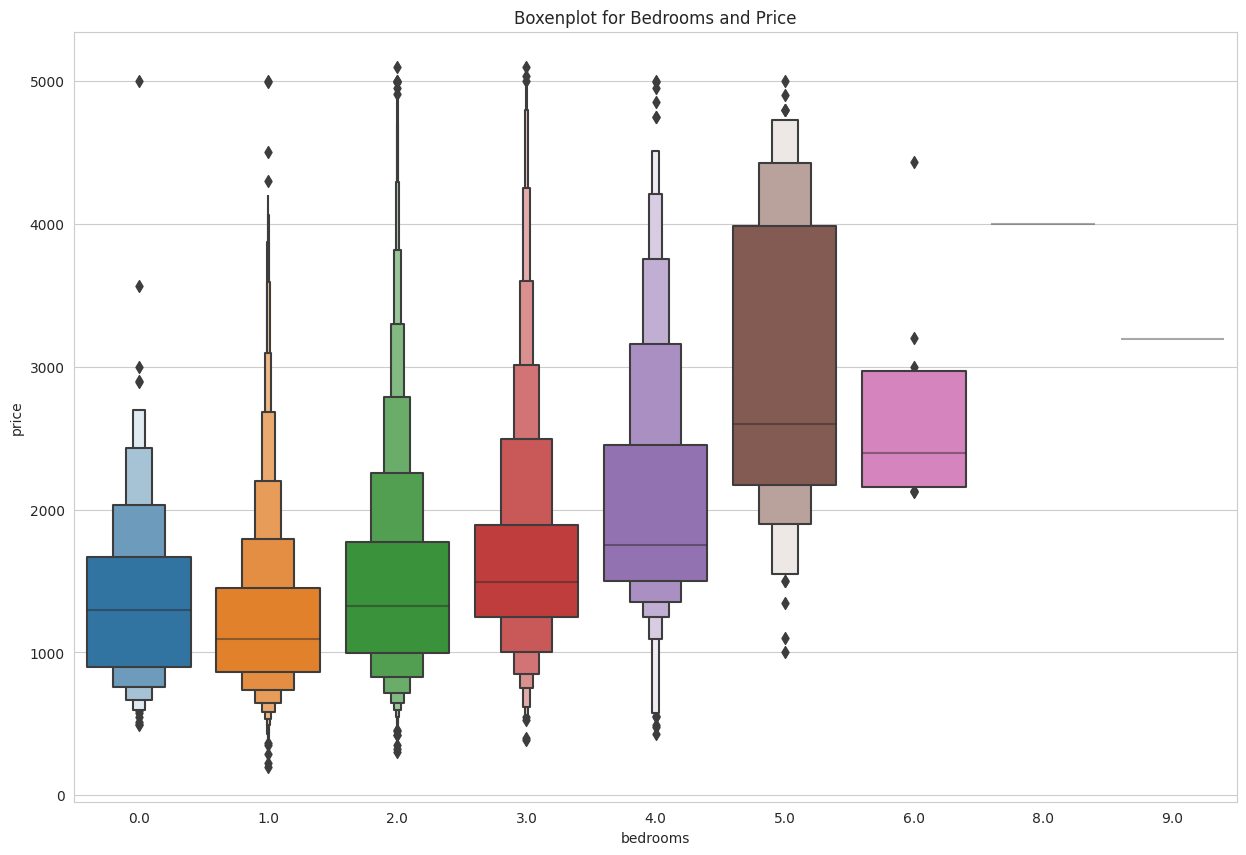

In [15]:
# Boxen plot for bedrooms and price using seaborn
fig, axes = plt.subplots(figsize=(15, 10))
sns.boxenplot(x="bedrooms", y='price', data=df1)
plt.title('Boxenplot for Bedrooms and Price')
plt.savefig('boxenplot_bedrooms_price.png')
plt.show()

# **Regression**

<ipython-input-16-e48c0a8d4bfa>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



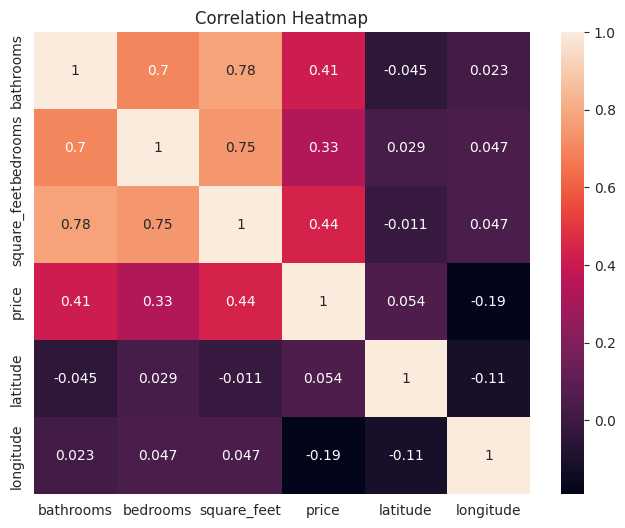

In [16]:
# Correlation heatmap
corr = df1.corr()
plt.subplots(figsize=(8, 6))
sns.heatmap(corr, vmax=1, square=False, annot=True)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

In [17]:
# One-hot encoding categorical columns
print("\nData Types after One-Hot Encoding:")
df1 = pd.get_dummies(df1, columns=['cityname', 'price_type', 'state', 'source'])
print(df1.dtypes)


Data Types after One-Hot Encoding:
bathrooms              float64
bedrooms               float64
square_feet              int64
price                    int64
latitude               float64
                        ...   
source_RealRentals       uint8
source_RentDigs.com      uint8
source_RentLingo         uint8
source_rentbits          uint8
source_tenantcloud       uint8
Length: 1634, dtype: object


In [18]:
# Splitting data for regression
X = df1.drop('price', axis=1)
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Scaling features for regression
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

# **Support Vector Regression**

In [19]:
# Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)
svr_prediction = svr.predict(X_test)

# Evaluation metrics for SVR
mae_svr = metrics.mean_absolute_error(y_test, svr_prediction)
mse_svr = metrics.mean_squared_error(y_test, svr_prediction)
rmse_svr = np.sqrt(mse_svr)

print('\nSupport Vector Regression Metrics:')
print('MAE:', mae_svr)
print('MSE:', mse_svr)
print('RMSE:', rmse_svr)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Support Vector Regression Metrics:
MAE: 0.39559382200941046
MSE: 0.38100847220517037
RMSE: 0.6172588372839796


# **Linear Regression**

In [20]:
# Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_prediction = lm.predict(X_test)

# Evaluation metrics for Linear Regression
mae_lm = metrics.mean_absolute_error(y_test, lm_prediction)
mse_lm = metrics.mean_squared_error(y_test, lm_prediction)
rmse_lm = np.sqrt(mse_lm)

print('\nLinear Regression Metrics:')
print(f"Mean Absolute Error (MAE): {mae_lm:.2f}")
print(f"Mean Squared Error (MSE): {mse_lm:.2e}")
print(f"Root Mean Squared Error (RMSE): {rmse_lm:.2f}")


Linear Regression Metrics:
Mean Absolute Error (MAE): 22816531608895.54
Mean Squared Error (MSE): 1.20e+28
Root Mean Squared Error (RMSE): 109333964793262.19


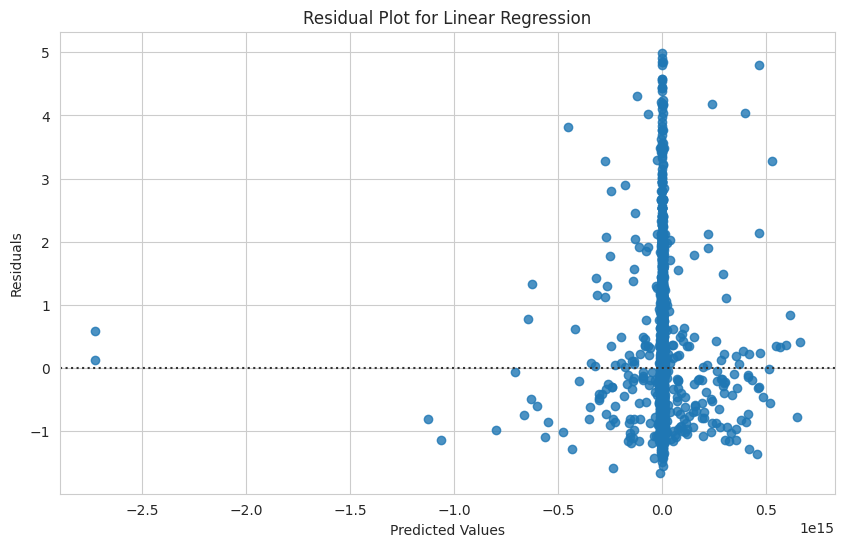

In [21]:
# Residual plot for Linear Regression
plt.figure(figsize=(10, 6))
sns.residplot(x=lm_prediction, y=y_test)
plt.title('Residual Plot for Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.savefig('residual_plot_linear_regression.png')
plt.show()

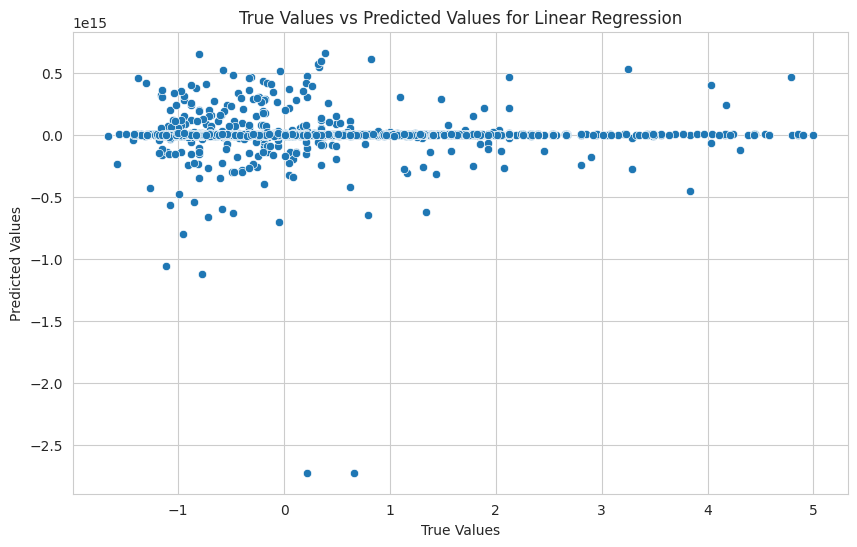

In [22]:
# Scatter plot of true values vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.ravel(), y=lm_prediction.ravel())
plt.title('True Values vs Predicted Values for Linear Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.savefig('scatter_plot_true_vs_predicted_linear_regression.png')
plt.show()

# **Classification**

In [23]:
# Handling missing values
df2 = df[selected_columns].dropna()

# Filtering outliers based on price
df2 = df2[df2['price'] <= 5100]

# Boxplot for rent prices on the subset
fig = px.box(df2, x="price", title='Boxplot for Rent Prices (Subset)')
fig.write_image("boxplot_rent_prices_subset.png")
fig.show()

In [24]:
# Creating a new feature 'price_category' based on 'price'
bins = [0, 500, 1000, float('inf')]
labels = ['Low', 'Medium', 'High']
df2['price_category'] = pd.cut(df2['price'], bins=bins, labels=labels, right=False)

# Features and target for classification
features1 = ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']
target1 = 'price_category'

# Handling missing values in the classification dataset
df2 = df2.dropna(subset=features1 + [target1])

# Splitting data for classification
X_train1, X_test1, y_train1, y_test1 = train_test_split(df2[features1], df2[target1], test_size=0.2, random_state=42)

# Grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train1, y_train1)

best_params = grid_search.best_params_
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train1, y_train1)
y_pred = best_rf_classifier.predict(X_test1)

# Evaluation metrics for classification
accuracy = accuracy_score(y_test1, y_pred)
classification_rep = classification_report(y_test1, y_pred)

print("\nBest Hyperparameters for Random Forest Classifier:", best_params)
print(f"Accuracy: {accuracy:.2f}")
print(classification_rep)



Best Hyperparameters for Random Forest Classifier: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy: 0.85
              precision    recall  f1-score   support

        High       0.89      0.91      0.90      1376
         Low       0.00      0.00      0.00        16
      Medium       0.75      0.72      0.73       568

    accuracy                           0.85      1960
   macro avg       0.54      0.54      0.54      1960
weighted avg       0.84      0.85      0.84      1960



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



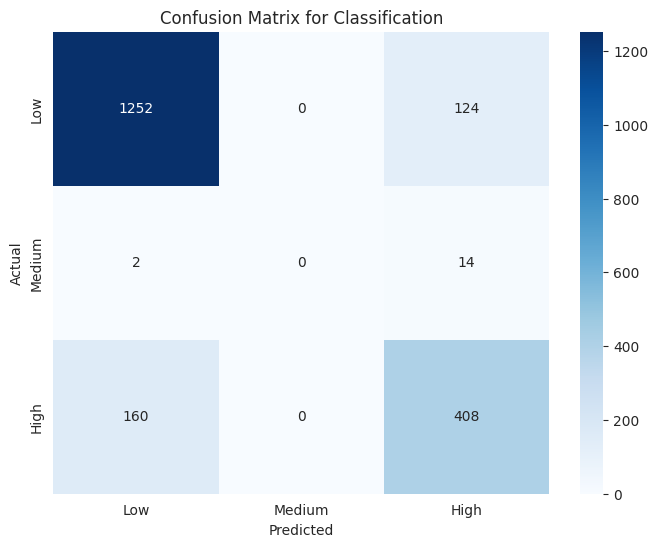

In [25]:
# Confusion matrix visualization
cm = confusion_matrix(y_test1, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('confusion_matrix_classification.png')
plt.show()
